In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler

In [4]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [37]:
df = pd.read_csv('/content/drive/MyDrive/code-2/heart.csv')
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


# First of all, we change the column names to be more intuitive. 

In [38]:
df.columns = ['age', 'sex', 'chest_pain_type', 'resting_blood_pressure', 'cholesterol', 
              'fasting_blood_sugar', 'resting_ecg', 'max_heart_rate', 'exercise_induce_angina', 'ST_depression',
             'ST_slope', 'num_major_vessels', 'blood_disorder', 'target']
df.head()

,age,sex,chest_pain_type,resting_blood_pressure,cholesterol,fasting_blood_sugar,resting_ecg,max_heart_rate,exercise_induce_angina,ST_depression,ST_slope,num_major_vessels,blood_disorder,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


# Data exploration

## 1. Check null values

In [39]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   age                     303 non-null    int64  
 1   sex                     303 non-null    int64  
 2   chest_pain_type         303 non-null    int64  
 3   resting_blood_pressure  303 non-null    int64  
 4   cholesterol             303 non-null    int64  
 5   fasting_blood_sugar     303 non-null    int64  
 6   resting_ecg             303 non-null    int64  
 7   max_heart_rate          303 non-null    int64  
 8   exercise_induce_angina  303 non-null    int64  
 9   ST_depression           303 non-null    float64
 10  ST_slope                303 non-null    int64  
 11  num_major_vessels       303 non-null    int64  
 12  blood_disorder          303 non-null    int64  
 13  target                  303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.

### No null value in our dataset

## 2. Check data is balanced or not

1    165
0    138
Name: target, dtype: int64

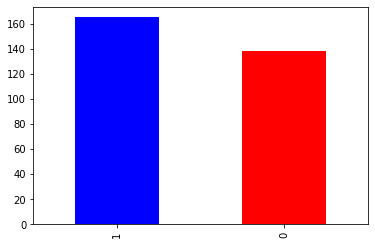

In [40]:
df.target.value_counts().plot(kind="bar", color = ['blue', 'red'])
df.target.value_counts()

### Our dataset is balanced

## 3. Check the disease results within each categorical attribute

### Draw plots

#### 1. Sex

/usr/local/lib/python3.7/dist-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)


Text(0.5, 0, 'sex')

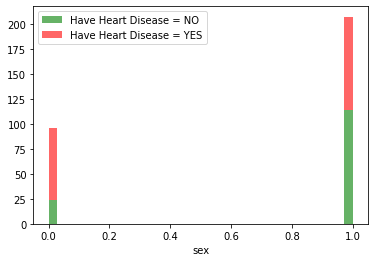

In [41]:
colors = ['green', 'red']
names = ['Have Heart Disease = NO', 'Have Heart Disease = YES']
plt.hist([list(df[df["target"] == 0]['sex']), list(df[df["target"] == 1]['sex'])], bins = 35, 
         stacked = True, color = colors, label = names, alpha=0.6)
plt.legend()
plt.xlabel('sex')

#### The heart disease distribute in different gender kind of evenly

#### 2. Chest_pain_type

/usr/local/lib/python3.7/dist-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)


Text(0.5, 0, 'chest_pain_type')

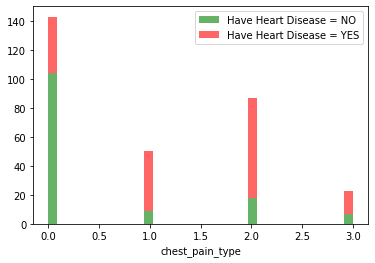

In [42]:
colors = ['green', 'red']
names = ['Have Heart Disease = NO', 'Have Heart Disease = YES']
plt.hist([list(df[df["target"] == 0]['chest_pain_type']), list(df[df["target"] == 1]['chest_pain_type'])], 
         bins = 35, stacked = True, color = colors, label = names, alpha=0.6)
plt.legend()
plt.xlabel('chest_pain_type')

#### For chest pain type, type 1, 2, 3 are more like to get heart disease than type 1.

#### 3. fasting_blood_sugar

/usr/local/lib/python3.7/dist-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)


Text(0.5, 0, 'fasting_blood_sugar')

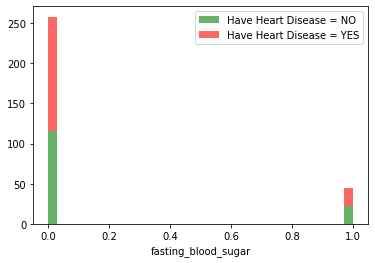

In [43]:
colors = ['green', 'red']
names = ['Have Heart Disease = NO', 'Have Heart Disease = YES']
plt.hist([list(df[df["target"] == 0]['fasting_blood_sugar']), list(df[df["target"] == 1]['fasting_blood_sugar'])], 
         bins = 35, stacked = True, color = colors, label = names, alpha=0.6)
plt.legend()
plt.xlabel('fasting_blood_sugar')

#### Heart disease distributes in fasting blood sugar evenly.

#### 4. resting_ecg

/usr/local/lib/python3.7/dist-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)


Text(0.5, 0, 'resting_ecg')

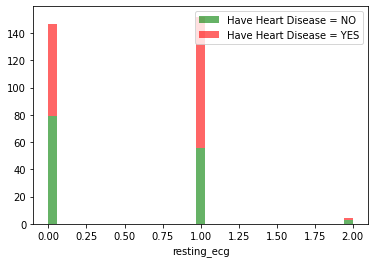

In [44]:
colors = ['green', 'red']
names = ['Have Heart Disease = NO', 'Have Heart Disease = YES']
plt.hist([list(df[df["target"] == 0]['resting_ecg']), list(df[df["target"] == 1]['resting_ecg'])], 
         bins = 35, stacked = True, color = colors, label = names, alpha=0.6)
plt.legend()
plt.xlabel('resting_ecg')

#### People from category 1 is more likely to have heart disease

#### 5. exercise_induce_angina

/usr/local/lib/python3.7/dist-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)


Text(0.5, 0, 'exercise_induce_angina')

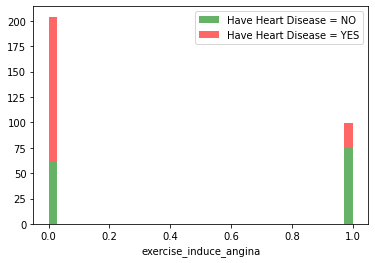

In [45]:
colors = ['green', 'red']
names = ['Have Heart Disease = NO', 'Have Heart Disease = YES']
plt.hist([list(df[df["target"] == 0]['exercise_induce_angina']), list(df[df["target"] == 1]['exercise_induce_angina'])], 
         bins = 35, stacked = True, color = colors, label = names, alpha=0.6)
plt.legend()
plt.xlabel('exercise_induce_angina')

#### People from category 0 is more likely to have heart disease than category 1.

#### 6. ST_slope

/usr/local/lib/python3.7/dist-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)


Text(0.5, 0, 'ST_slope')

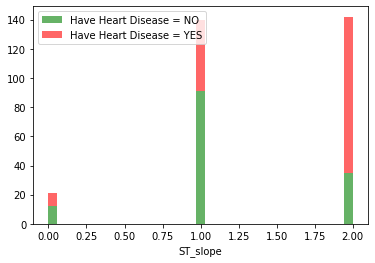

In [46]:
colors = ['green', 'red']
names = ['Have Heart Disease = NO', 'Have Heart Disease = YES']
plt.hist([list(df[df["target"] == 0]['ST_slope']), list(df[df["target"] == 1]['ST_slope'])], 
         bins = 35, stacked = True, color = colors, label = names, alpha=0.6)
plt.legend()
plt.xlabel('ST_slope')

#### People from category 2 is more likely to have heart disease than category 1 and 0.

#### 7. blood_disorder

/usr/local/lib/python3.7/dist-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)


Text(0.5, 0, 'blood_disorder')

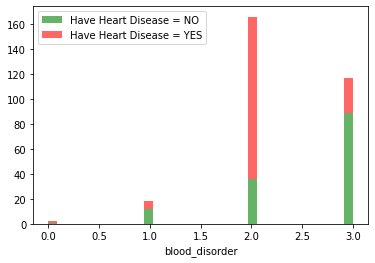

In [47]:
colors = ['green', 'red']
names = ['Have Heart Disease = NO', 'Have Heart Disease = YES']
plt.hist([list(df[df["target"] == 0]['blood_disorder']), list(df[df["target"] == 1]['blood_disorder'])], 
         bins = 35, stacked = True, color = colors, label = names, alpha=0.6)
plt.legend()
plt.xlabel('blood_disorder')

#### People from category 2 is more likely to have heart disease than others.

## 4. Check the disease results within each numerical attribute

#### 1. age

/usr/local/lib/python3.7/dist-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)


Text(0.5, 0, 'age')

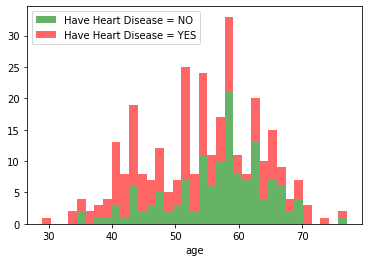

In [48]:
colors = ['green', 'red']
names = ['Have Heart Disease = NO', 'Have Heart Disease = YES']
plt.hist([list(df[df["target"] == 0]['age']), list(df[df["target"] == 1]['age'])], 
         bins = 35, stacked = True, color = colors, label = names, alpha=0.6)
plt.legend()
plt.xlabel('age')

#### 2. resting_blood_pressure

/usr/local/lib/python3.7/dist-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)


Text(0.5, 0, 'resting_blood_pressure')

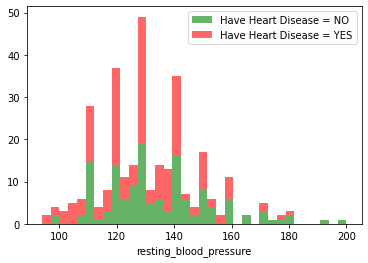

In [49]:
colors = ['green', 'red']
names = ['Have Heart Disease = NO', 'Have Heart Disease = YES']
plt.hist([list(df[df["target"] == 0]['resting_blood_pressure']), list(df[df["target"] == 1]['resting_blood_pressure'])], 
         bins = 35, stacked = True, color = colors, label = names, alpha=0.6)
plt.legend()
plt.xlabel('resting_blood_pressure')

#### Look like the resting blood pressure ranges from 110 to 150 have high possibility of having heart disease.

#### 3. cholesterol

/usr/local/lib/python3.7/dist-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)


Text(0.5, 0, 'cholesterol')

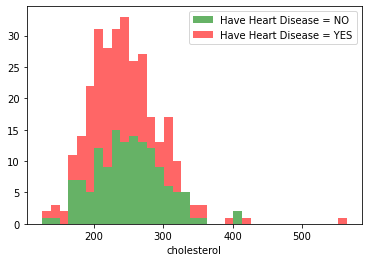

In [50]:
colors = ['green', 'red']
names = ['Have Heart Disease = NO', 'Have Heart Disease = YES']
plt.hist([list(df[df["target"] == 0]['cholesterol']), list(df[df["target"] == 1]['cholesterol'])], 
         bins = 35, stacked = True, color = colors, label = names, alpha=0.6)
plt.legend()
plt.xlabel('cholesterol')

#### 4. max_heart_rate

/usr/local/lib/python3.7/dist-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)


Text(0.5, 0, 'max_heart_rate')

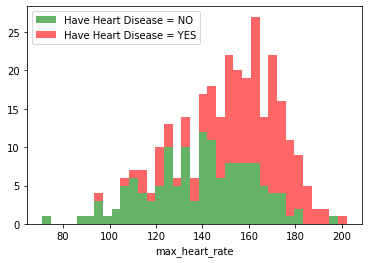

In [51]:
colors = ['green', 'red']
names = ['Have Heart Disease = NO', 'Have Heart Disease = YES']
plt.hist([list(df[df["target"] == 0]['max_heart_rate']), list(df[df["target"] == 1]['max_heart_rate'])], 
         bins = 35, stacked = True, color = colors, label = names, alpha=0.6)
plt.legend()
plt.xlabel('max_heart_rate')

#### Max heart rate higher than 140 is more likely to have heart disease.

#### 5. ST_depression

/usr/local/lib/python3.7/dist-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)


Text(0.5, 0, 'ST_depression')

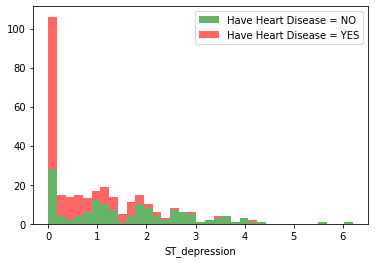

In [52]:
colors = ['green', 'red']
names = ['Have Heart Disease = NO', 'Have Heart Disease = YES']
plt.hist([list(df[df["target"] == 0]['ST_depression']), list(df[df["target"] == 1]['ST_depression'])], 
         bins = 35, stacked = True, color = colors, label = names, alpha=0.6)
plt.legend()
plt.xlabel('ST_depression')

#### The lower ST despression people has the higher rate to have heart disease.

#### 6. num_major_vessels

/usr/local/lib/python3.7/dist-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)


Text(0.5, 0, 'num_major_vessels')

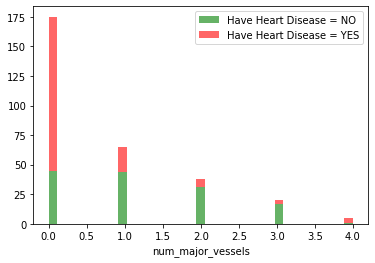

In [53]:
colors = ['green', 'red']
names = ['Have Heart Disease = NO', 'Have Heart Disease = YES']
plt.hist([list(df[df["target"] == 0]['num_major_vessels']), list(df[df["target"] == 1]['num_major_vessels'])], 
         bins = 35, stacked = True, color = colors, label = names, alpha=0.6)
plt.legend()
plt.xlabel('num_major_vessels')

#### Zero major vessel has the highest heart disease rate. The rate drops dramatically once you have more than zero vessels.

## 5. Correlation Matrix

(14.5, -0.5)

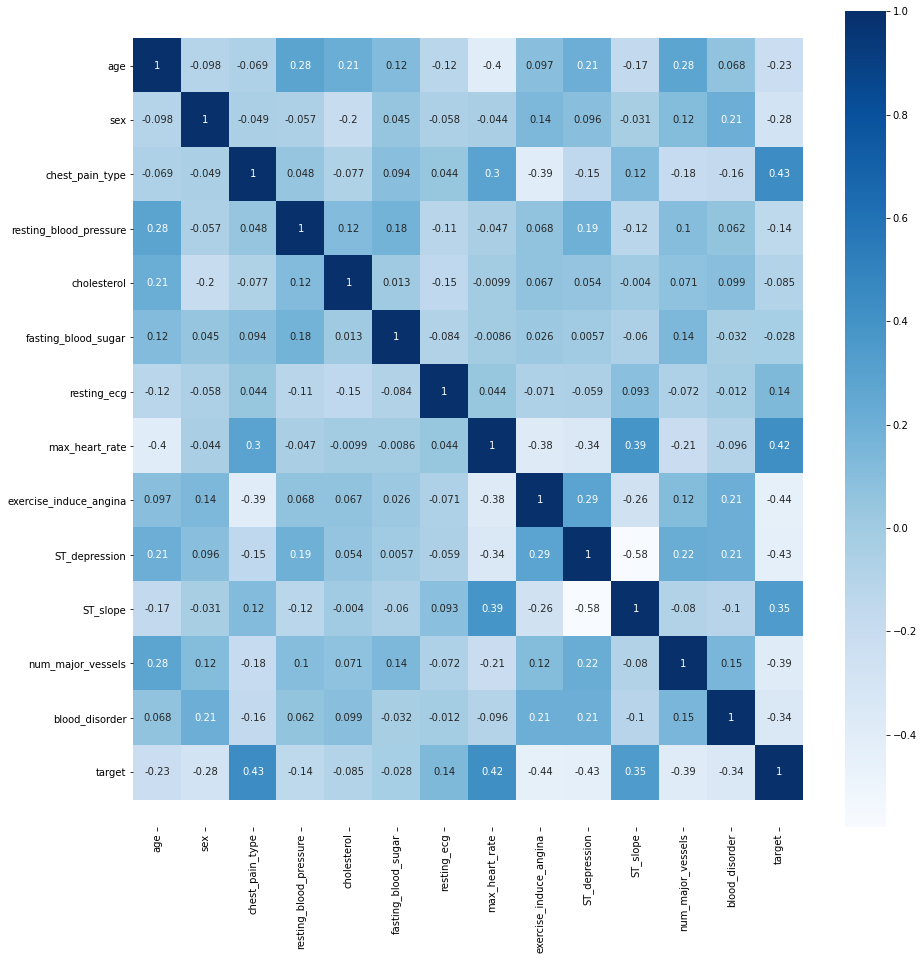

In [54]:
corrMatrix = df.corr()
fig, ax = plt.subplots(figsize=(15, 15))
sns.heatmap(corrMatrix, 
            annot = True, 
            cmap="Blues")
bottom, top = ax.get_ylim()
ax.set_ylim(bottom + 0.5, top - 0.5)

#### We can see that cholesterol and fasting blood sugar have the lowest correlation with target.

# Data processing

## 1. Change attributes data types

In [55]:
df['sex'] = df['sex'].astype('object')
df['chest_pain_type'] = df['chest_pain_type'].astype('object')
df['fasting_blood_sugar'] = df['fasting_blood_sugar'].astype('object')
df['resting_ecg'] = df['resting_ecg'].astype('object')
df['exercise_induce_angina'] = df['exercise_induce_angina'].astype('object')
df['ST_slope'] = df['ST_slope'].astype('object')
df['blood_disorder'] = df['blood_disorder'].astype('object')
df.dtypes

age                         int64
sex                        object
chest_pain_type            object
resting_blood_pressure      int64
cholesterol                 int64
fasting_blood_sugar        object
resting_ecg                object
max_heart_rate              int64
exercise_induce_angina     object
ST_depression             float64
ST_slope                   object
num_major_vessels           int64
blood_disorder             object
target                      int64
dtype: object

## 2. Convert categorical variable into dummy/indicator variables.

In [56]:
df = pd.get_dummies(df)
new_cols = [col for col in df.columns if col != 'target'] + ['target']
df = df[new_cols]
df.head()

,age,resting_blood_pressure,cholesterol,max_heart_rate,ST_depression,num_major_vessels,sex_0,sex_1,chest_pain_type_0,chest_pain_type_1,chest_pain_type_2,chest_pain_type_3,fasting_blood_sugar_0,fasting_blood_sugar_1,resting_ecg_0,resting_ecg_1,resting_ecg_2,exercise_induce_angina_0,exercise_induce_angina_1,ST_slope_0,ST_slope_1,ST_slope_2,blood_disorder_0,blood_disorder_1,blood_disorder_2,blood_disorder_3,target
0,63,145,233,150,2.3,0,0,1,0,0,0,1,0,1,1,0,0,1,0,1,0,0,0,1,0,0,1
1,37,130,250,187,3.5,0,0,1,0,0,1,0,1,0,0,1,0,1,0,1,0,0,0,0,1,0,1
2,41,130,204,172,1.4,0,1,0,0,1,0,0,1,0,1,0,0,1,0,0,0,1,0,0,1,0,1
3,56,120,236,178,0.8,0,0,1,0,1,0,0,1,0,0,1,0,1,0,0,0,1,0,0,1,0,1
4,57,120,354,163,0.6,0,1,0,1,0,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,1


## 3. Data Normalization

In [57]:
cols_to_norm = ['age', 'resting_blood_pressure', 'cholesterol', 'max_heart_rate', 'ST_depression']
df_norm = df.copy()
df_norm[cols_to_norm] = df_norm[cols_to_norm].apply(lambda x: (x - x.min()) / (x.max() - x.min()))
df_norm.head()

,age,resting_blood_pressure,cholesterol,max_heart_rate,ST_depression,num_major_vessels,sex_0,sex_1,chest_pain_type_0,chest_pain_type_1,chest_pain_type_2,chest_pain_type_3,fasting_blood_sugar_0,fasting_blood_sugar_1,resting_ecg_0,resting_ecg_1,resting_ecg_2,exercise_induce_angina_0,exercise_induce_angina_1,ST_slope_0,ST_slope_1,ST_slope_2,blood_disorder_0,blood_disorder_1,blood_disorder_2,blood_disorder_3,target
0,0.708333,0.481132,0.244292,0.603053,0.370968,0,0,1,0,0,0,1,0,1,1,0,0,1,0,1,0,0,0,1,0,0,1
1,0.166667,0.339623,0.283105,0.885496,0.564516,0,0,1,0,0,1,0,1,0,0,1,0,1,0,1,0,0,0,0,1,0,1
2,0.250000,0.339623,0.178082,0.770992,0.225806,0,1,0,0,1,0,0,1,0,1,0,0,1,0,0,0,1,0,0,1,0,1
3,0.562500,0.245283,0.251142,0.816794,0.129032,0,0,1,0,1,0,0,1,0,0,1,0,1,0,0,0,1,0,0,1,0,1
4,0.583333,0.245283,0.520548,0.702290,0.096774,0,1,0,1,0,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,1


## 4. Data Standardization

In [58]:
cols_to_stand = ['age', 'resting_blood_pressure', 'cholesterol', 'max_heart_rate', 'ST_depression']
df_stand = df.copy()
df_stand[cols_to_stand] = StandardScaler().fit_transform(df_stand[cols_to_stand])
df_stand.head()

,age,resting_blood_pressure,cholesterol,max_heart_rate,ST_depression,num_major_vessels,sex_0,sex_1,chest_pain_type_0,chest_pain_type_1,chest_pain_type_2,chest_pain_type_3,fasting_blood_sugar_0,fasting_blood_sugar_1,resting_ecg_0,resting_ecg_1,resting_ecg_2,exercise_induce_angina_0,exercise_induce_angina_1,ST_slope_0,ST_slope_1,ST_slope_2,blood_disorder_0,blood_disorder_1,blood_disorder_2,blood_disorder_3,target
0,0.952197,0.763956,-0.256334,0.015443,1.087338,0,0,1,0,0,0,1,0,1,1,0,0,1,0,1,0,0,0,1,0,0,1
1,-1.915313,-0.092738,0.072199,1.633471,2.122573,0,0,1,0,0,1,0,1,0,0,1,0,1,0,1,0,0,0,0,1,0,1
2,-1.474158,-0.092738,-0.816773,0.977514,0.310912,0,1,0,0,1,0,0,1,0,1,0,0,1,0,0,0,1,0,0,1,0,1
3,0.180175,-0.663867,-0.198357,1.239897,-0.206705,0,0,1,0,1,0,0,1,0,0,1,0,1,0,0,0,1,0,0,1,0,1
4,0.290464,-0.663867,2.082050,0.583939,-0.379244,0,1,0,1,0,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,1


## 5. Split Dataset

In [59]:
from sklearn.model_selection import train_test_split

In [60]:
train, test = train_test_split(df, test_size = 0.2, random_state = 0)
train_norm, test_norm = train_test_split(df_norm, test_size = 0.2, random_state = 0)
train_stand, test_stand = train_test_split(df_stand, test_size = 0.2, random_state = 0)

train_y = train.target
train_x = train.drop(['target'], axis = 1)
test_y = test.target
test_x = test.drop(['target'], axis = 1)

train_norm_y = train_norm.target
train_norm_x = train_norm.drop(['target'], axis = 1)
test_norm_y = test_norm.target
test_norm_x = test_norm.drop(['target'], axis = 1)

train_stand_y = train_stand.target
train_stand_x = train_stand.drop(['target'], axis = 1)
test_stand_y = test_stand.target
test_stand_x = test_stand.drop(['target'], axis = 1)

# Algorithms Implementation

> Indented block



In [64]:
from sklearn import svm
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn import metrics
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
from sklearn.metrics import cohen_kappa_score
import matplotlib.pyplot as plt
import numpy as np

## 1. Logistic Regression - Sklearn

#### Original Dataset

In [65]:
logreg_origin = LogisticRegression(solver='lbfgs', max_iter=10000)
logreg_origin.fit(train_x, train_y)
logreg_prediction_origin = logreg_origin.predict(test_x)
print('Accuracy for Original Dataset:', metrics.accuracy_score(logreg_prediction_origin,test_y) * 100)

Accuracy for Original Dataset: 85.24590163934425


#### Normalization Dataset

In [66]:
logreg_norm = LogisticRegression(solver='lbfgs', max_iter=10000)
logreg_norm.fit(train_norm_x, train_norm_y)
logreg_prediction_norm = logreg_norm.predict(test_norm_x)
print('Accuracy for Normalization Dataset:', metrics.accuracy_score(logreg_prediction_norm,test_norm_y) * 100)

Accuracy for Normalization Dataset: 85.24590163934425


#### Standardization Dataset

In [67]:
logreg_stand = LogisticRegression(solver='lbfgs', max_iter=10000)
logreg_stand.fit(train_stand_x, train_stand_y)
logreg_prediction_stand = logreg_stand.predict(test_stand_x)
print('Accuracy for Standardization Dataset:', metrics.accuracy_score(logreg_prediction_stand,test_stand_y) * 100)

Accuracy for Standardization Dataset: 83.60655737704919


### Model Evaluation

#### 1. AUC value for Normalization dataset

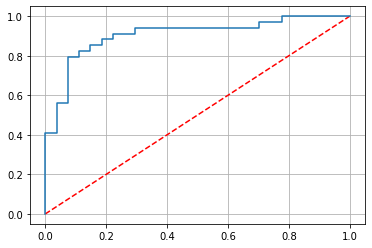

In [120]:
logreg_prediction_prob = logreg_norm.predict_proba(test_norm_x)

lr_fpr,lr_tpr,lr_th = roc_curve(test_norm_y,logreg_prediction_prob[:,1])
plt.plot([0,1],[0,1],'r--')
plt.plot(lr_fpr, lr_tpr)
plt.grid(True)
plt.show()

In [121]:
logreg_auc_score = roc_auc_score(test_norm_y, logreg_prediction_prob[:,1])
print('AUC value for LogisticRegression model is: ', logreg_auc_score)

AUC value for LogisticRegression model is:  0.9052287581699346


#### 2. Confusion Matrix

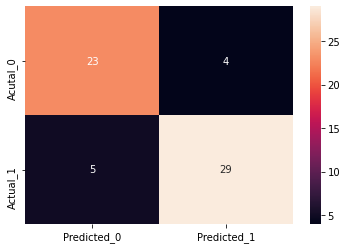

In [70]:
logreg_cm= confusion_matrix(test_norm_y, logreg_prediction_norm)
logreg_cmd=pd.DataFrame(data=logreg_cm , index=['Acutal_0','Actual_1'],columns=['Predicted_0','Predicted_1'])
sns.heatmap(logreg_cmd, annot=True)
plt.show()

#### 3. Classification Report

In [71]:
logreg_report = classification_report(test_norm_y, logreg_prediction_norm)
print(logreg_report)

              precision    recall  f1-score   support

           0       0.82      0.85      0.84        27
           1       0.88      0.85      0.87        34

    accuracy                           0.85        61
   macro avg       0.85      0.85      0.85        61
weighted avg       0.85      0.85      0.85        61



#### 4. Cohen's Kappa Statistic

In [72]:
logreg_cohen_kappa = cohen_kappa_score(test_norm_y, logreg_prediction_norm)
print('cohen_kappa value is: ', logreg_cohen_kappa)

cohen_kappa value is:  0.7021161150298426


## 2. K-Nestest Neighbors

### Find value K by finding the maximum testing score

In [73]:
test_scores = []
train_scores = []

test_norm_scores = []
train_norm_scores = []

test_stand_scores = []
train_stand_scores = []

for i in range(1,15):

    knn = KNeighborsClassifier(i)
    knn.fit(train_x, train_y)
    
    train_scores.append(knn.score(train_x, train_y))
    test_scores.append(knn.score(test_x, test_y))

for i in range(1,15):

    knn_norm = KNeighborsClassifier(i)
    knn_norm.fit(train_norm_x, train_norm_y)
    
    train_norm_scores.append(knn_norm.score(train_norm_x, train_norm_y))
    test_norm_scores.append(knn_norm.score(test_norm_x, test_norm_y))
    
for i in range(1,15):

    knn_stand = KNeighborsClassifier(i)
    knn_stand.fit(train_stand_x, train_stand_y)
    
    train_stand_scores.append(knn_stand.score(train_stand_x, train_stand_y))
    test_stand_scores.append(knn_stand.score(test_stand_x, test_stand_y))

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


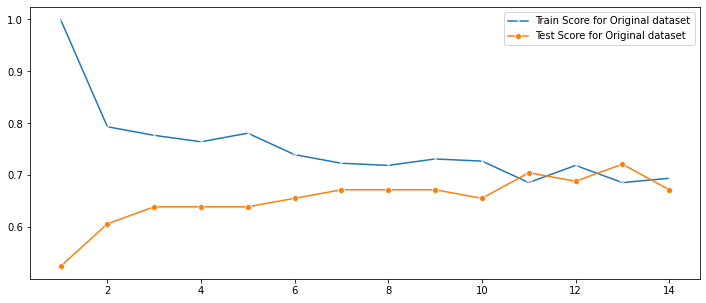

In [74]:
plt.figure(figsize=(12,5))
p = sns.lineplot(range(1,15),train_scores,marker='x',label='Train Score for Original dataset')
p = sns.lineplot(range(1,15),test_scores,marker='o',label='Test Score for Original dataset')

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


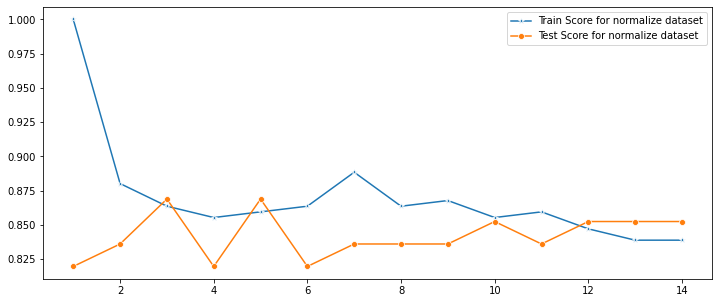

In [75]:
plt.figure(figsize=(12,5))
p = sns.lineplot(range(1,15),train_norm_scores,marker='*',label='Train Score for normalize dataset')
p = sns.lineplot(range(1,15),test_norm_scores,marker='o',label='Test Score for normalize dataset')

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


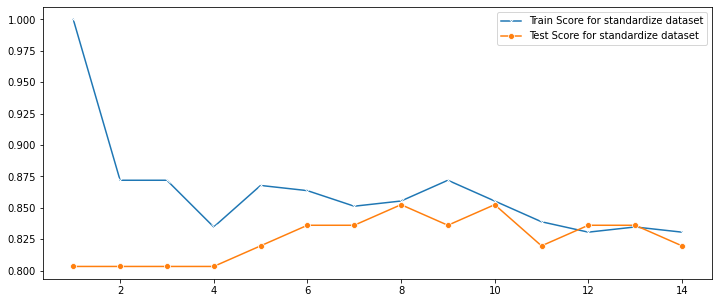

In [76]:
plt.figure(figsize=(12,5))
p = sns.lineplot(range(1,15),train_stand_scores,marker='x',label='Train Score for standardize dataset')
p = sns.lineplot(range(1,15),test_stand_scores,marker='o',label='Test Score for standardize dataset')

### Build KNN model on three dataset

#### Original Dataset

In [77]:
knn = KNeighborsClassifier(13)
knn.fit(train_x, train_y)
print('Accuracy for Original Dataset:', knn.score(test_x, test_y) * 100)


Accuracy for Original Dataset: 72.1311475409836


#### Normalization Dataset

In [78]:
knn_norm = KNeighborsClassifier(5)
knn_norm.fit(train_norm_x, train_norm_y)
print('Accuracy for Normalization Dataset:', knn_norm.score(test_norm_x, test_norm_y) * 100)


Accuracy for Normalization Dataset: 86.88524590163934


#### Standardization Dataset

In [79]:
knn_stand = KNeighborsClassifier(10)
knn_stand.fit(train_stand_x, train_stand_y)
print('Accuracy for Standardization Dataset:', knn_stand.score(test_stand_x, test_stand_y) * 100)

Accuracy for Standardization Dataset: 85.24590163934425


### Model Evaluation

#### 1. AUC value for Normalization dataset

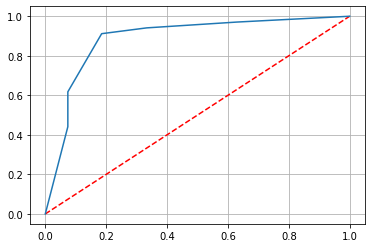

In [122]:
knn_prediction_prob = knn_norm.predict_proba(test_norm_x)

knn_fpr,knn_tpr,knn_th = roc_curve(test_norm_y,knn_prediction_prob[:,1])
plt.plot([0,1],[0,1],'r--')
plt.plot(knn_fpr, knn_tpr)
plt.grid(True)
plt.show()

In [81]:
knn_auc_score = roc_auc_score(test_norm_y, knn_prediction_prob[:,1])
print('AUC value for KNN model is: ', knn_auc_score)

AUC value for KNN model is:  0.8867102396514162


#### 2. Confusion Matrix

Text(0.5, 1.0, 'Confusion Matrix of K-nearest Neighbor: Normalize dataset')

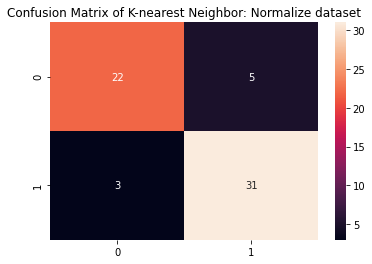

In [82]:
knn_norm_y_pred = knn_norm.predict(test_norm_x)
confusion_matrix(test_norm_y,knn_norm_y_pred)
sns.heatmap(confusion_matrix(test_norm_y,knn_norm_y_pred), annot=True).set_title('Confusion Matrix of K-nearest Neighbor: Normalize dataset')

#### 3. Classification Report

In [83]:
print('K-nearest Neighbor: Normalizae dataset')
print(classification_report(test_norm_y,knn_norm_y_pred))

K-nearest Neighbor: Normalizae dataset
              precision    recall  f1-score   support

           0       0.88      0.81      0.85        27
           1       0.86      0.91      0.89        34

    accuracy                           0.87        61
   macro avg       0.87      0.86      0.87        61
weighted avg       0.87      0.87      0.87        61



#### 4. Cohen's Kappa Statistic

In [84]:
knn_cohen_kappa = cohen_kappa_score(test_norm_y, knn_norm_y_pred)
print('cohen_kappa value is: ', knn_cohen_kappa)

cohen_kappa value is:  0.7321624588364435


## 3. Decision Tree

#### Original Dataset

In [113]:
dt_origin = DecisionTreeClassifier()
dt_origin.fit(train_x, train_y)
dt_prediction_origin = dt_origin.predict(test_x)
print('Accuracy for Original Dataset:', metrics.accuracy_score(dt_prediction_origin,test_y) * 100)

Accuracy for Original Dataset: 78.68852459016394


#### Normalization Dataset

In [114]:
dt_norm = DecisionTreeClassifier()
dt_norm.fit(train_norm_x, train_norm_y)
dt_prediction_norm = dt_norm.predict(test_norm_x)
print('Accuracy for Original Dataset:', metrics.accuracy_score(dt_prediction_norm,test_norm_y) * 100)

Accuracy for Original Dataset: 78.68852459016394


#### Standardization Dataset

In [115]:
dt_stand = DecisionTreeClassifier()
dt_stand.fit(train_stand_x, train_stand_y)
dt_prediction_stand = dt_stand.predict(test_stand_x)
print('Accuracy for Original Dataset:', metrics.accuracy_score(dt_prediction_stand,test_stand_y) * 100)

Accuracy for Original Dataset: 75.40983606557377


### Model Evaluation

#### 1. AUC value for Normalization dataset

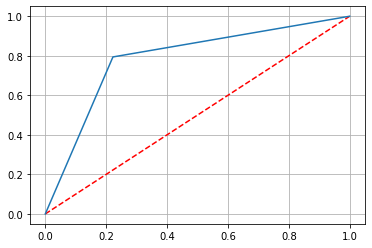

In [123]:
dt_prediction_prob = dt_norm.predict_proba(test_norm_x)

dt_fpr,dt_tpr,dt_th = roc_curve(test_norm_y,dt_prediction_prob[:,1])
plt.plot([0,1],[0,1],'r--')
plt.plot(dt_fpr,dt_tpr)
plt.grid(True)
plt.show()

In [124]:
dt_auc_score = roc_auc_score(test_norm_y, dt_prediction_prob[:,1])
print('AUC value for Decision Tree model is: ', dt_auc_score)

AUC value for Decision Tree model is:  0.7859477124183006


#### 2. Confusion Matrix

Text(0.5, 1.0, 'Confusion Matrix of K-nearest Neighbor: Normalize dataset')

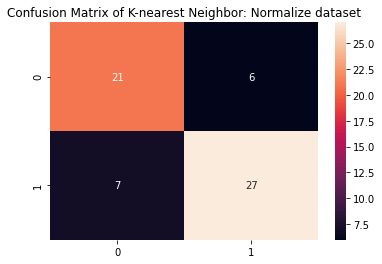

In [117]:
dt_norm_y_pred = dt_norm.predict(test_norm_x)
confusion_matrix(test_norm_y,dt_norm_y_pred)
sns.heatmap(confusion_matrix(test_norm_y,dt_norm_y_pred), annot=True).set_title('Confusion Matrix of K-nearest Neighbor: Normalize dataset')

#### 3. Classification Report

In [118]:
print('Decision Tree: Normalizae dataset')
print(classification_report(test_norm_y,dt_norm_y_pred))

Decision Tree: Normalizae dataset
              precision    recall  f1-score   support

           0       0.75      0.78      0.76        27
           1       0.82      0.79      0.81        34

    accuracy                           0.79        61
   macro avg       0.78      0.79      0.78        61
weighted avg       0.79      0.79      0.79        61



#### 4. Cohen's Kappa Statistic

In [92]:
dt_cohen_kappa = cohen_kappa_score(test_norm_y, dt_norm_y_pred)
print('cohen_kappa value is: ', dt_cohen_kappa)

cohen_kappa value is:  0.5383783783783784


#### 5. Exploring the feature importance of the decision tree model

In [93]:
importance = dt_norm.feature_importances_
im=pd.DataFrame(importance)
col=pd.DataFrame(list(train_norm_x.columns))
rank=pd.DataFrame(list(zip(train_norm_x.columns, importance)),
               columns =['feature', 'score'])
print(rank.sort_values('score',ascending=False))

                     feature     score
24          blood_disorder_2  0.293278
8          chest_pain_type_0  0.133062
4              ST_depression  0.113135
2                cholesterol  0.096798
5          num_major_vessels  0.087550
3             max_heart_rate  0.079902
1     resting_blood_pressure  0.075871
0                        age  0.051129
18  exercise_induce_angina_1  0.012482
7                      sex_1  0.012205
10         chest_pain_type_2  0.011987
20                ST_slope_1  0.011095
21                ST_slope_2  0.008321
15             resting_ecg_1  0.008321
23          blood_disorder_1  0.004863
22          blood_disorder_0  0.000000
19                ST_slope_0  0.000000
13     fasting_blood_sugar_1  0.000000
17  exercise_induce_angina_0  0.000000
16             resting_ecg_2  0.000000
14             resting_ecg_0  0.000000
12     fasting_blood_sugar_0  0.000000
11         chest_pain_type_3  0.000000
9          chest_pain_type_1  0.000000
6                      se

## 4. Support Vector Machine (SVM) - Sklearn

#### Original Dataset

In [94]:
svm_origin = svm.SVC(random_state = 1, probability=True)
svm_origin.fit(train_x, train_y)
svm_prediction_origin = svm_origin.predict(test_x)
print('Accuracy for Original Dataset:', metrics.accuracy_score(svm_prediction_origin,test_y) * 100)

Accuracy for Original Dataset: 68.85245901639344


#### Normalization Dataset

In [95]:
svm_norm = svm.SVC(random_state = 1, probability=True)
svm_norm.fit(train_norm_x, train_norm_y)
svm_prediction_norm = svm_norm.predict(test_norm_x)
print('Accuracy for Normalization Dataset:', metrics.accuracy_score(svm_prediction_norm,test_norm_y) * 100)

Accuracy for Normalization Dataset: 88.52459016393442


#### Standardization Dataset

In [96]:
svm_stand = svm.SVC(random_state = 1, probability=True)
svm_stand.fit(train_stand_x, train_stand_y)
svm_prediction_stand = svm_stand.predict(test_stand_x)
print('Accuracy for Standardization Dataset:', metrics.accuracy_score(svm_prediction_stand,test_stand_y) * 100)

Accuracy for Standardization Dataset: 86.88524590163934


### Model Evaluation

#### 1. AUC value for Normalization dataset

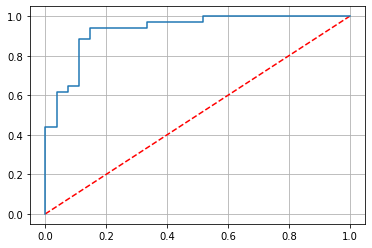

In [125]:
svm_prediction_prob = svm_norm.predict_proba(test_norm_x)

svm_fpr,svm_tpr,svm_th = roc_curve(test_norm_y,svm_prediction_prob[:,1])
plt.plot([0,1],[0,1],'r--')
plt.plot(svm_fpr, svm_tpr)
plt.grid(True)
plt.show()

In [98]:
svm_auc_score = roc_auc_score(test_norm_y, svm_prediction_prob[:,1])
print('AUC value for SVM model is: ', svm_auc_score)

AUC value for SVM model is:  0.9313725490196079


#### 2. Confusion Matrix

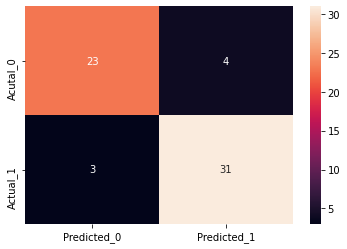

In [99]:
svm_cm= confusion_matrix(test_norm_y, svm_prediction_norm)
svm_cmd=pd.DataFrame(data=svm_cm , index=['Acutal_0','Actual_1'],columns=['Predicted_0','Predicted_1'])
sns.heatmap(svm_cmd, annot=True)
plt.show()

#### 3. Classification Report

In [100]:
svm_report = classification_report(test_norm_y, svm_prediction_norm)
print(svm_report)

              precision    recall  f1-score   support

           0       0.88      0.85      0.87        27
           1       0.89      0.91      0.90        34

    accuracy                           0.89        61
   macro avg       0.89      0.88      0.88        61
weighted avg       0.89      0.89      0.88        61



#### 4. Cohen's Kappa Statistic

In [101]:
svm_cohen_kappa = cohen_kappa_score(test_norm_y, svm_prediction_norm)
print('cohen_kappa value is: ', svm_cohen_kappa)

cohen_kappa value is:  0.7665390924002187


## 5. Naïve Bayisan

#### For Naive Bayisan, all datasets receive the same result

In [102]:
nb_origin = GaussianNB()
nb_origin.fit(train_x, train_y)
nb_prediction_origin = nb_origin.predict(test_x)
print('Accuracy for Original Dataset:', metrics.accuracy_score(nb_prediction_origin,test_y) * 100)

Accuracy for Original Dataset: 85.24590163934425


### Model Evaluation

#### 1. AUC value for Normalization dataset

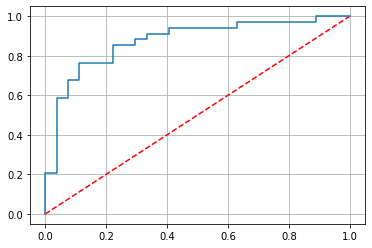

In [127]:
nb_prediction_prob = nb_origin.predict_proba(test_norm_x)

nb_fpr,nb_tpr,nb_th = roc_curve(test_norm_y,nb_prediction_prob[:,1])
plt.plot([0,1],[0,1],'r--')
plt.plot(nb_fpr, nb_tpr)
plt.grid(True)
plt.show()

In [128]:
nb_auc_score = roc_auc_score(test_norm_y, nb_prediction_prob[:,1])
print('AUC value for Naive Bayisan model is: ', nb_auc_score)

AUC value for Naive Bayisan model is:  0.8747276688453158


#### 2. Confusion Matrix

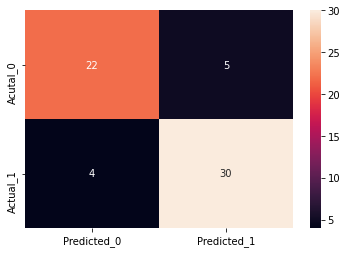

In [104]:
nb_cm= confusion_matrix(test_norm_y, nb_prediction_origin)
nb_cmd=pd.DataFrame(data=nb_cm , index=['Acutal_0','Actual_1'],columns=['Predicted_0','Predicted_1'])
sns.heatmap(nb_cmd, annot=True)
plt.show()

#### 3. Classification Report

> Indented block



In [105]:
nb_report = classification_report(test_norm_y, nb_prediction_origin)
print(nb_report)

              precision    recall  f1-score   support

           0       0.85      0.81      0.83        27
           1       0.86      0.88      0.87        34

    accuracy                           0.85        61
   macro avg       0.85      0.85      0.85        61
weighted avg       0.85      0.85      0.85        61



#### 4. Cohen's Kappa Statistic

In [106]:
nb_cohen_kappa = cohen_kappa_score(test_norm_y, nb_prediction_origin)
print('cohen_kappa value is: ', nb_cohen_kappa)

cohen_kappa value is:  0.6998359759431383


# Performance Evaluation


4. ROC Comparison

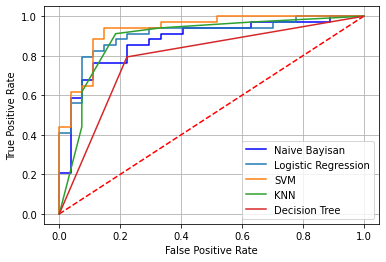

In [137]:
plt.plot([0,1],[0,1],'r--')
plt.plot(nb_fpr, nb_tpr, 'b',label = 'Naive Bayisan')
plt.plot(lr_fpr, lr_tpr,label = 'Logistic Regression')
plt.plot(svm_fpr, svm_tpr,label = 'SVM')
plt.plot(knn_fpr, knn_tpr,label = 'KNN')
plt.plot(dt_fpr, dt_tpr,label = 'Decision Tree')
plt.legend(loc = 'lower right')
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.grid(True)
plt.show()

In [143]:
data = {'Model':  ['Logistic Regression', 'KNN',"Decision Tree","SVM","Naive Bayisan"],
        'Accuracy': [85.2459, 86.8852,77.04918,88.5246,85.2459],
         'f1': [0.85,0.87,0.79,0.89,0.85],
        'AUC': [0.9052,0.8867,0.7712,0.9314,0.8747],
        'cohen_kappa': [0.7021,0.7321,0.5384,0.7665,0.6998]
        }

df_1 = pd.DataFrame (data, columns = ['Model','Accuracy','f1','AUC','cohen_kappa'])

print (df_1)

                 Model  Accuracy    f1     AUC  cohen_kappa
0  Logistic Regression  85.24590  0.85  0.9052       0.7021
1                  KNN  86.88520  0.87  0.8867       0.7321
2        Decision Tree  77.04918  0.79  0.7712       0.5384
3                  SVM  88.52460  0.89  0.9314       0.7665
4        Naive Bayisan  85.24590  0.85  0.8747       0.6998
